<h1><center>Fig3 stats

This notebook contains statistical analysis of the data from the figure 3.

# Install libraries

Install necessary libraries to run statistical tests in R.

In [4]:
# Use R in Jupyter Notebook
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [2]:
%%R
install.packages("readxl")
install.packages("dplyr")

install.packages("ggplot2")

install.packages("nlme")
install.packages("multcomp")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/readxl_1.3.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2056165 bytes (2.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [3]:
%%R
library("readxl")
library("dplyr")

library("ggplot2")

library("nlme")
library("multcomp")

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: 
Attaching package: ‘nlme’


R[write to console]: The following object is masked from ‘package:dplyr’:

    collapse


R[write to console]: Loading required package: mvtnorm

R[write to console]: Loading required package: survival

R[write to console]: Loading required package: TH.data

R[write to console]: Loading required package: MASS

R[write to console]: 
Attaching package: ‘MASS’


R[write to console]: The following object is masked from ‘package:dplyr’:

    select


R[write to console]: 
Attaching package: ‘TH.data’


R[write to console]: The following object is masked from ‘package:MASS’:

    geyser




And run function at the end of the notebook.

# Directory

Set directory with the source data. Mount disk if you use Google Colab.

In [5]:
# Mount disk if you use Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Change directory
%cd /content/drive/MyDrive/!lab/Manuscripts/LHoutputs/full submission 2/sourcedata

/content/drive/MyDrive/!lab/Manuscripts/LHoutputs/full submission 2/sourcedata


# APT Fig3B

In [ ]:
%%R
df <- read_excel("fig3_LHretro.xlsx", sheet = "APT")
df$output = as.factor(df$output)
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('baseline','airpuff')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('baseline','airpuff'))

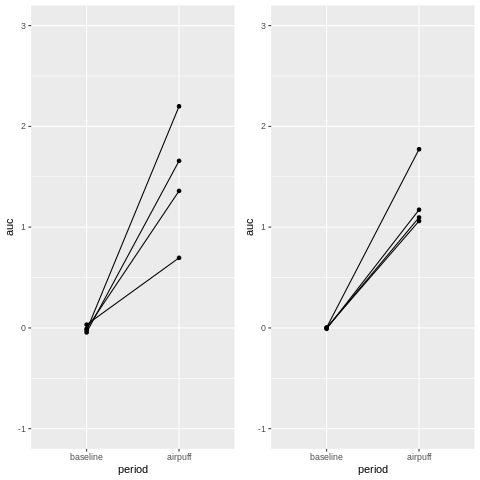

In [ ]:
%%R
p1 <- ggplot(df[(df$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1,3)
p2 <- ggplot(df[(df$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1,3)
multiplot(p1,p2, cols=2)

$n < 5$

Repeated measures ANOVA on ranks with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(rank(auc) ~ output*period, random=~1|mouse, data=df)
summary(anova)

              Df Sum Sq Mean Sq F value   Pr(>F)    
output         1   0.25    0.25   0.039    0.847    
period         1 256.00  256.00  39.639 3.97e-05 ***
output:period  1   6.25    6.25   0.968    0.345    
Residuals     12  77.50    6.46                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
# GCaMP
%%R
print('----------------------LHA-DRN----------------------')
drn = df[df$output=='LHA-DRN',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = df[df$output=='LHA-VTA',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=vta)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = drn, random = ~1 | 
    mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
airpuff - baseline == 0   4.0000     0.9129   4.382 1.18e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = vta, random = ~1 | 
    mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
airpuff - baseline == 0   4.0000     0.8165   4.899 9.63e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values repor

# SCT Fig3C

In [ ]:
%%R
df <- read_excel("fig3_LHretro.xlsx", sheet = "SCT")
df$output = as.character(df$output)
df$period = as.character(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('baseline','onset','drinking')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('baseline','onset','drinking'))

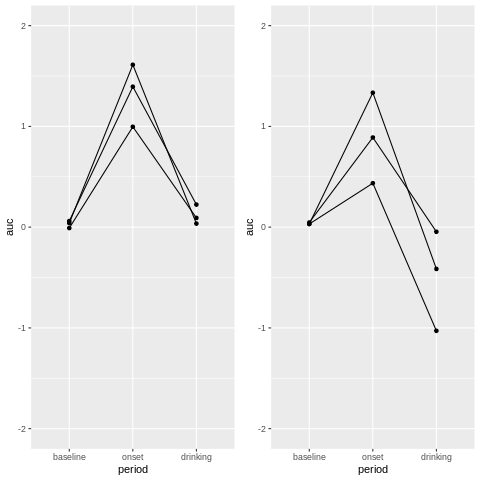

In [ ]:
%%R
p1 <- ggplot(df[(df$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2,2)
p2 <- ggplot(df[(df$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-2,2)
multiplot(p1,p2, cols=2)

$n<5$

Repeated measures ANOVA on ranks with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(auc ~ output*period, random=~1|mouse, data=df)
summary(anova)

              Df Sum Sq Mean Sq F value   Pr(>F)    
output         1  0.556  0.5558   5.995   0.0307 *  
period         2  5.799  2.8993  31.272 1.74e-05 ***
output:period  2  0.308  0.1542   1.663   0.2304    
Residuals     12  1.113  0.0927                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
# GCaMP
%%R
print('----------------------LHA-DRN----------------------')
drn = df[df$output=='LHA-DRN',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = df[df$output=='LHA-VTA',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=vta)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = drn, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
onset - baseline == 0       5.333      1.305   4.086 8.72e-05 ***
drinking - baseline == 0    1.667      1.305   1.277    0.336    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = vta, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
onset - baseline == 0      3.0000     0.7454   4.025 0.000113 ***
drinking - baseline =

# OFT Fig3D

In [ ]:
%%R
df <- read_excel("fig3_LHretro.xlsx", sheet = "OFT")
df$output = as.character(df$output)
df$period = as.character(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('immobile','preonset','onset','mobile'))

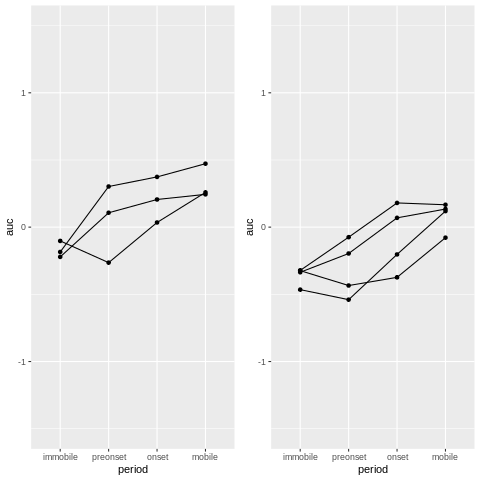

In [ ]:
%%R
p1 <- ggplot(df[(df$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1.5,1.5)
p2 <- ggplot(df[(df$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1.5,1.5)
multiplot(p1,p2, cols=2)

$n<5$

Repeated measures ANOVA on ranks with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(auc ~ output*period, random=~1|mouse, data=df)
summary(anova)

              Df Sum Sq Mean Sq F value   Pr(>F)    
output         1 0.4981  0.4981  15.502 0.000815 ***
period         3 0.9039  0.3013   9.378 0.000448 ***
output:period  3 0.0263  0.0088   0.273 0.844218    
Residuals     20 0.6426  0.0321                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
print('----------------------LHA-DRN----------------------')
drn = df[df$output=='LHA-DRN',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = df[df$output=='LHA-VTA',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=vta)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = drn, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0    2.667      1.841   1.449   0.3335    
onset - immobile == 0       4.667      1.841   2.535   0.0306 *  
mobile - immobile == 0      6.667      1.841   3.621   <0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = vta, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile =

Mobile score

In [7]:
%%R
df <- read_excel("fig3_LHretro.xlsx", sheet = "OFT_mobileScore")
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [8]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('immobile','preonset','onset','mobile'))

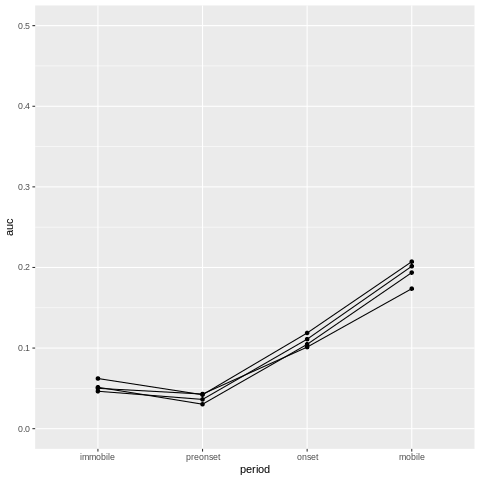

In [10]:
%%R
ggplot(df, aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(0,0.5)

$n<5$

Repeated measures ANOVA on ranks with Dunnett poshoc analysis

In [11]:
%%R
anova <- aov(rank(auc) ~ period, random=~1|mouse, data=df)
summary(anova)

            Df Sum Sq Mean Sq F value   Pr(>F)    
period       3    320  106.67      64 1.18e-07 ***
Residuals   12     20    1.67                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=df)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = df, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0  -4.0000     0.7993  -5.004 1.37e-06 ***
onset - immobile == 0      4.0000     0.7993   5.004 1.69e-06 ***
mobile - immobile == 0     8.0000     0.7993  10.009  < 1e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



# TST Fig3E

In [ ]:
%%R
df <- read_excel("fig3_LHretro.xlsx", sheet = "TST")
df$output = as.character(df$output)
df$period = as.character(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('immobile','preonset','onset','mobile'))

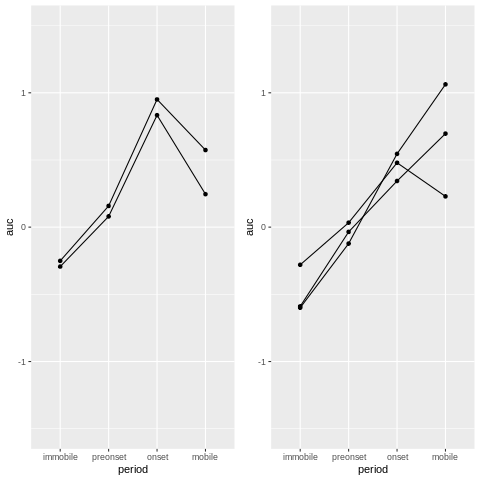

In [ ]:
%%R
p1 <- ggplot(df[(df$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1.5,1.5)
p2 <- ggplot(df[(df$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-1.5,1.5)
multiplot(p1,p2, cols=2)

$n < 5$

Repeated measures ANOVA on ranks with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(auc ~ output*period, random=~1|mouse, data=df)
summary(anova)

              Df Sum Sq Mean Sq F value   Pr(>F)    
output         1  0.094  0.0944   2.208    0.163    
period         3  3.553  1.1844  27.693 1.12e-05 ***
output:period  3  0.298  0.0994   2.323    0.127    
Residuals     12  0.513  0.0428                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
print('----------------------LHA-DRN----------------------')
drn = df[df$output=='LHA-DRN',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = df[df$output=='LHA-VTA',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=vta)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = drn, random = ~1 | 
    mouse)

Linear Hypotheses:
                          Estimate Std. Error   z value Pr(>|z|)    
preonset - immobile == 0 2.000e+00  7.094e-16 2.819e+15   <2e-16 ***
onset - immobile == 0    6.000e+00  7.094e-16 8.457e+15   <2e-16 ***
mobile - immobile == 0   4.000e+00  7.094e-16 5.638e+15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = vta, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset 

Mobile score

In [12]:
%%R
df <- read_excel("fig3_LHretro.xlsx", sheet = "TST_mobileScore")
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [13]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('immobile','preonset','onset','mobile'))

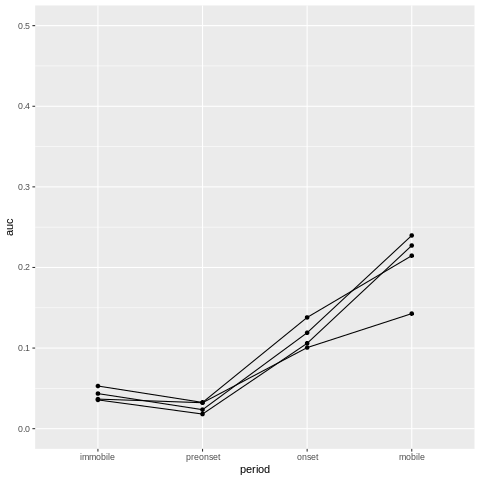

In [14]:
%%R
ggplot(df, aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(0,0.5)

$n<5$

Repeated measures ANOVA on ranks with Dunnett poshoc analysis

In [15]:
%%R
anova <- aov(rank(auc) ~ period, random=~1|mouse, data=df)
summary(anova)

            Df Sum Sq Mean Sq F value   Pr(>F)    
period       3    320  106.67      64 1.18e-07 ***
Residuals   12     20    1.67                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=df)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = df, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0  -4.0000     0.7638  -5.237   <1e-06 ***
onset - immobile == 0      4.0000     0.7638   5.237   <1e-06 ***
mobile - immobile == 0     8.0000     0.7638  10.474   <1e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



# Functions

In [9]:
%%R
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}